# CNN - Parte 1 (solución)

En este ejercicio trabajaremos con la [base de datos CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Esta base de datos contiene un total de 60,000 imágenes a color de 32x32 clasificadas en 10 clases distintas. Las clases son: aviones, autos, pájaros, gatos, venados, perros, ranas, caballos, barcos y camiones (hay 6,000 imágenes de cada clase). Esta es una de las bases de datos más utilizadas para machine learning e inteligencia artificial.

El ejercicio está dividido en dos partes:
1. Clasificación con un multi-layer perceptron
2. **Clasificación con una red CNN**

### Resumen
En esta segunda parte del ejercicio armaremos una red neuronal convolucional para tratar de clasificar las imágenes en las 10 clases distintas. Compararemos los resultados con los obtenidos con el multi-layer perceptron.

Esta parte está dividida en:
1. Cargar la base de datos CIFAR-10
2. Pre-procesar los datos
3. Armado de la red neuronal
4. Compilación y entrenamiento
5. Evaluación de resultados y comparación con MLP

## 1  - Cargar la base de datos CIFAR-10
Primero cargaremos la base de datos que ya viene pre-cargada en los datasets de Keras.

In [ ]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

A continuación visualizamos algunas de las imágenes de nuestra base de datos. Notar que la mala resolución es consecuencia de que son imágenes de 32x32. A pesar de esto, trataremos de clasificarlas correctamente.

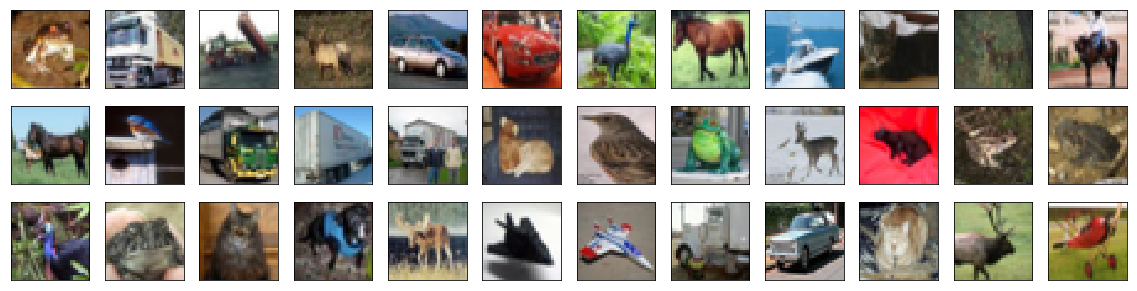

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

## 2 -Pre-procesar los datos
Recordar que las imágenes son matrices donde la intensidad está reflejada por un número del 0 al 255. Lo primero que haremos será normalizar la imágenes para que la intensidad solo varíe entre 0 y 1. Dividir cada pixel entre 255 para normalizar nuestros datos.

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Ahora separamos los datos en datos de test, train y validación. También aplicamos One-hot encoding para trabajar con nuestros labels.

In [4]:
from keras.utils import np_utils

# One-hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Separo los datos de train en datos de train y validación a partir de un punto arbitrario
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

## 3 - Armado de la red neuronal
Armar una red neuronal convolucional que incluya:
1. Una capa Conv2D con 16 filtros, tamaño de kernel 2, padding 'same', activación Relu y el input shape necesario
2. Una capa de MaxPooling2D con pool size 2
3. Una capa Conv2D con 32 filtros, tamaño de kernel 2, padding 'same' y activación Relu
4. Una capa de MaxPooling2D con pool size 2
5. Una capa Conv2D con 64 filtros, tamaño de kernel 2, padding 'same' y activación Relu
6. Una capa de MaxPooling2D con pool size 2
7. Una capa de Dropout con factor 0.3
8. Una capa de Flatten
9. Una capa densa con 500 nodos y activación Relu
10. Una capa de Dropout con factor 0.5
11. Una capa densa con 10 nodos y activación softmax

In [5]:
### SOLUCIÓN

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

## 4 - Compilación y entrenamiento
Es momento de compilar y entrenar el modelo. Compilarlo con optimizador rmsprop y función de pérdida categorical crossentropy.

In [6]:
### SOLUCIÓN
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Entrenar el modelo con 100 epochs, un batch_size de 32 y utilizando el callback 'checkpointer'. El callback utilizado guardará los mejores pesos en cada iteración. Esto nos permitirá descartar combinaciones de pesos que empeoren nuestros resultados con respecto a la iteración anterior.

In [ ]:
### SOLUCIÓN
from keras.callbacks import ModelCheckpoint   

#Defino callback
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

#Entreno modelo
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpointer],verbose=1, shuffle=True)

Ahora cargamos la mejor combinación de pesos que encontramos durante el entrenamiento con la función load_weights de Keras a partir del archivo que guardamos con el checkpoint durante el entrenamiento.

In [ ]:
model.load_weights('model.weights.best.hdf5')

Ya que el entrenamiento de imágenes es muy largo, podemos usar un modelo guardado que ya fue entrenado con estos datos y parámetros arriba indicados. 

Debajo encontrarán también el código utilizado para guardar el modelo. Si desean entrenar ustedes mismos el modelo y hacer predicciones con él simplemente cambien los nombres de los archivos debajo o comenten todo el siguiente bloque de código.

In [7]:
from keras.models import load_model
# Creo un archivo HDF5: Incluirá la arquitectura y pesos del modelo.
#model.save('my_model_cnn.h5')
#Borro el modelo existente
#del model

# Levanto el modelo (arquitectura y pesos) de un archivo HDF5 guardado
model = load_model('saved_model_cnn.h5')


## 5 - Evaluación de resultados y comparación con MLP
Ahora utilizaremos la función evaluate de keras para determinar la precisión de nuestro modelo sobre los datos de test. Se puede leer sobre su uso [aquí](https://keras.io/models/model/).

In [8]:
### SOLUCIÓN
score = model.evaluate(x_test, y_test)
print('\n', 'Precisión en test:', score[1])

10000/10000 [==============================] - 7s 731us/step

 Precisión en test: 0.6617


Visualizaremos algunas de las predicciones hechas por nuestro modelo.

In [9]:
# Obtener predicciones
y_hat = model.predict(x_test)
# Defino labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

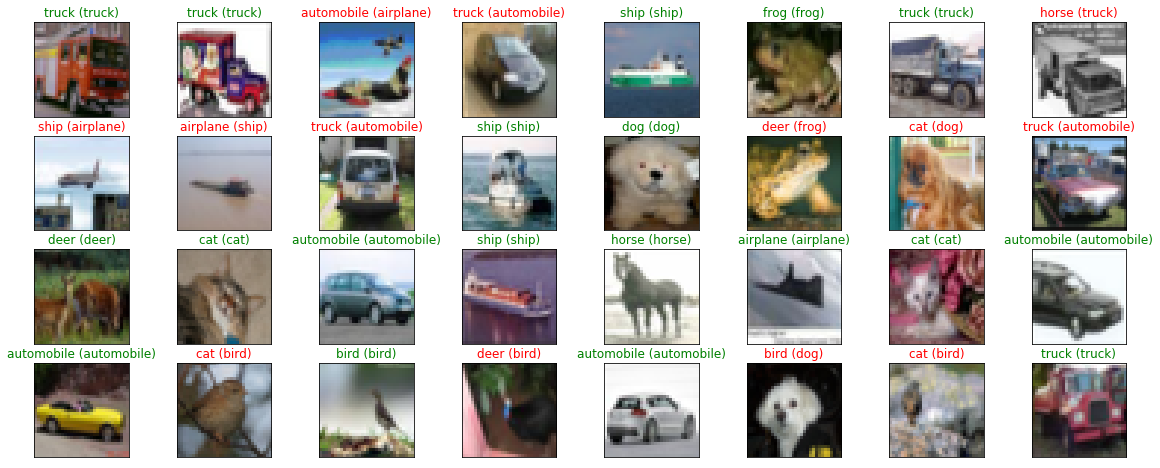

In [10]:
# Grafico imágenes al azar, con el label predicho y el verdadero
# En texto verde quedarán los labels de las imágenes correctamente clasificadas y en rojo las otras.
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

** ¿Nuestro modelo con CNN es mejor o peor que el modelo con un multi-layer perceptron? **

** Respuesta: ** Es mejor

** ¿A qué creemos que se debe el resultado? **

** Respuesta: ** Las capas CNN guardan información espacial de la imagen que es relevante que se perdió en el primer modelo cuando los datos pasaron por la capa de Flatten al comienzo de la red.